## This is a Colab notebook!

# End-to-End Multi-class dog breed Classification

This notebook builds an end to end multi-class image classifier using tensorflow 2.0 and tensorhub.

## 1. Problem
Identifying the breed of a dog given an image of a dog

## 2. Data
The data we're using is from kaggles dog breed identification competition:
https://www.kaggle.com/competitions/dog-breed-identification/data

## 3. Evalutaion
The evaluation is a file with prediction probabilities for each dog breed for each test image

https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## 4. Features
Some information about the data:
* We're dealing with images (unstructured data) so its probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ in the training and test sets. These images in the training data have labels, whereas the images in the test set have no labels because we'll want to predict them.


In [ ]:
# Unzipping data
#!unzip "/content/drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog Vision"

# Get our workspace ready

* Import TensorFlow 2.x ✅
* Import TensorFlow Hub
* Make sure we're using a GPU



In [1]:
# Import TensorFlow into Colab
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

TF version: 2.17.0
TF Hub version: 0.16.1
GPU available


# Getting our data ready (turning into Tensors)

With all machine learning models, our data has to be in numerical format. So thats we'll be doing first. Turning our images into Tensors (numerical representations).

Lets start by accessing our data and checking out the labels.

In [2]:
# Check out the labels of our data
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog Vision/labels.csv")
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

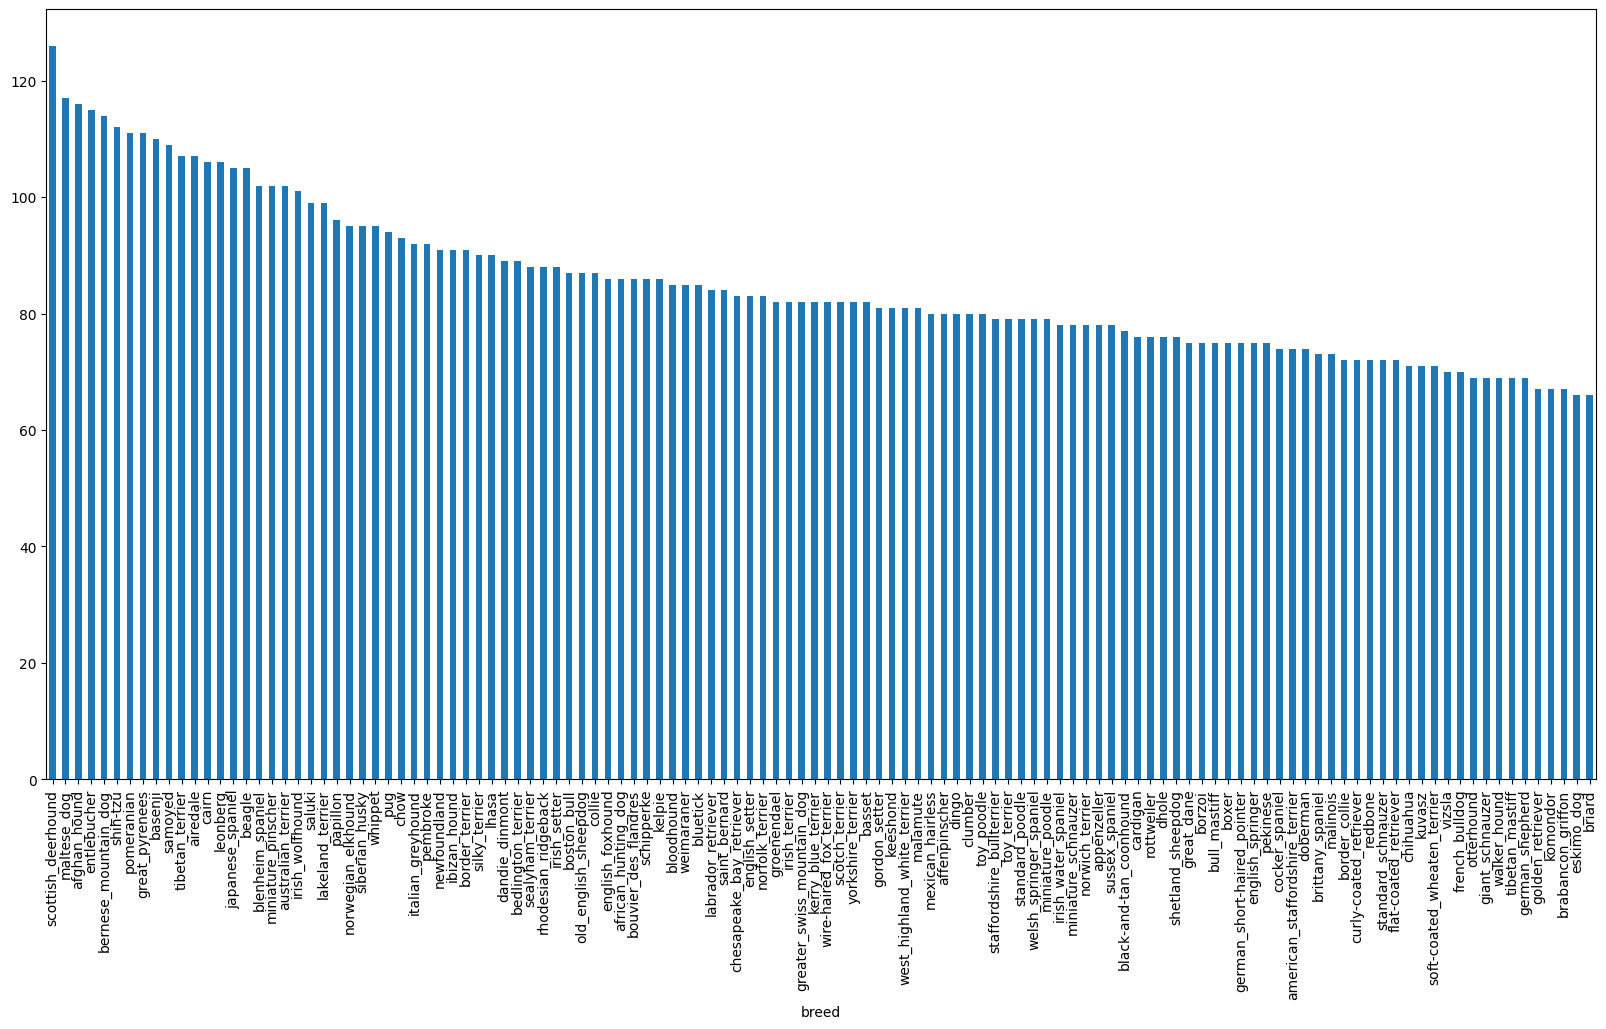

In [ ]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

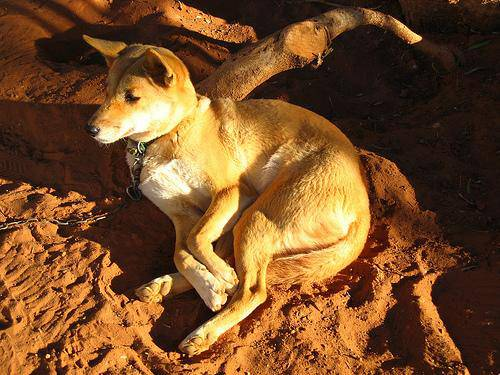

In [ ]:
# Lets view an image
from IPython.display import Image
Image("drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels

Let's get a list of all of our image file pathnames



In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [3]:
# Create pathnames from image ID's
filenames = ["drive/MyDrive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

#Check the first 10
filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [4]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/MyDrive/Dog Vision/train")) == len(filenames):
  print("Filenames match actual amount of files")
else:
  print("Filenames do not match actual amount of files")

Filenames match actual amount of files


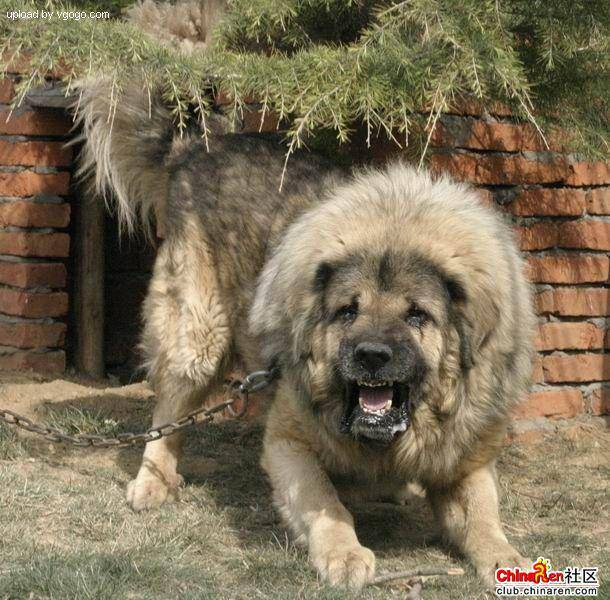

In [ ]:
# One more check
Image(filenames[9000])

In [ ]:
labels_csv["breed"][9000]

'tibetan_mastiff'

Since we've now got out training image filepaths in a list, lets prepare our labels.

In [5]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [6]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames")
else:
  print("Number of labels does not match number of filenames")

Number of labels matches number of filenames


In [8]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [9]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [10]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [11]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array

boston_bull
(array([19]),)
19


In [12]:
print(labels[1]) # original label
print(np.where(unique_breeds == labels[1])) # index where label occurs
print(boolean_labels[1].argmax()) # index where label occurs in boolean array

dingo
(array([37]),)
37


### Creating our own validation set
Since the dataset from Kaggle doesnt come with a validation set, we need to create our own.

In [13]:
# Setup X & y variables
X = filenames
y = boolean_labels

We're going to start off experimenting with ~1000 images and increase as needed.

In [14]:
from ast import Num
# Set number of images to use for experimenting
Num_images = 1000 #@param {type:"slider", min:1000, max:10000, step:100}
NUM_IMAGES = Num_images

In [15]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

## Preprocessing Images (turning images into tensors)

To preprocess our images into tensors we're going to write a function which does a few things:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image (convert color channel values from 0-255 to 0-1)
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

Before we do, lets see what importing an image looks like.

In [16]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [17]:
image.max(), image.min()

(255, 0)

In [18]:
# Turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

Now we've seen what an image looks like as a Tensor, let's make a function to preprocess them.

In [19]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size = IMG_SIZE):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)

  # Turn the jpeg image into numerical Tensor with 3 color channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image to our desired size (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image


## Turning our data into batches

Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.

So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be).

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this: `(image, label)`

In [20]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

Now we've got a way to turn our data into tuple of Tensors in the form: `(image, label)`, let's make a function to turn all of our data (`X` & `y`) into batches!

In [21]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we dont need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) #labels
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turning the training data into batches
    data_batch = data.batch(BATCH_SIZE)

  return data_batch

In [22]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [23]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is now in batches, however, these can be a little hard to understand/comprehend, lets visualize them

In [24]:
import matplotlib.pyplot as plt

In [25]:
# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    ax = plt.subplot(5,5, i+1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(unique_breeds[labels[i].argmax()])


In [26]:
train_images, train_labels = next(train_data.as_numpy_iterator())

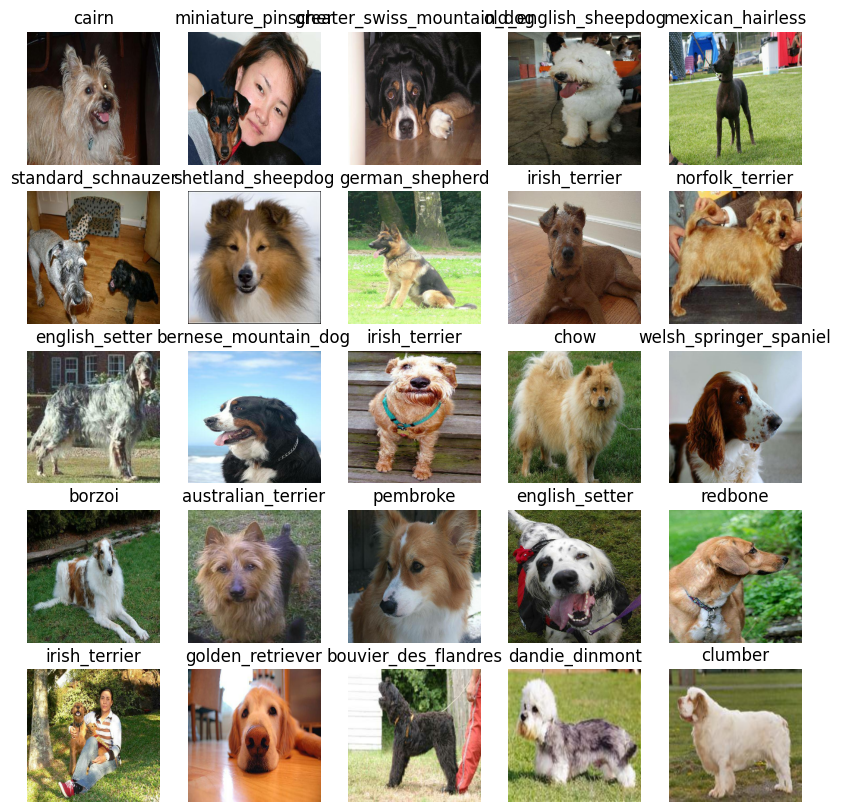

In [27]:
# Now lets visualize the data in a training batch
show_25_images(train_images, train_labels)

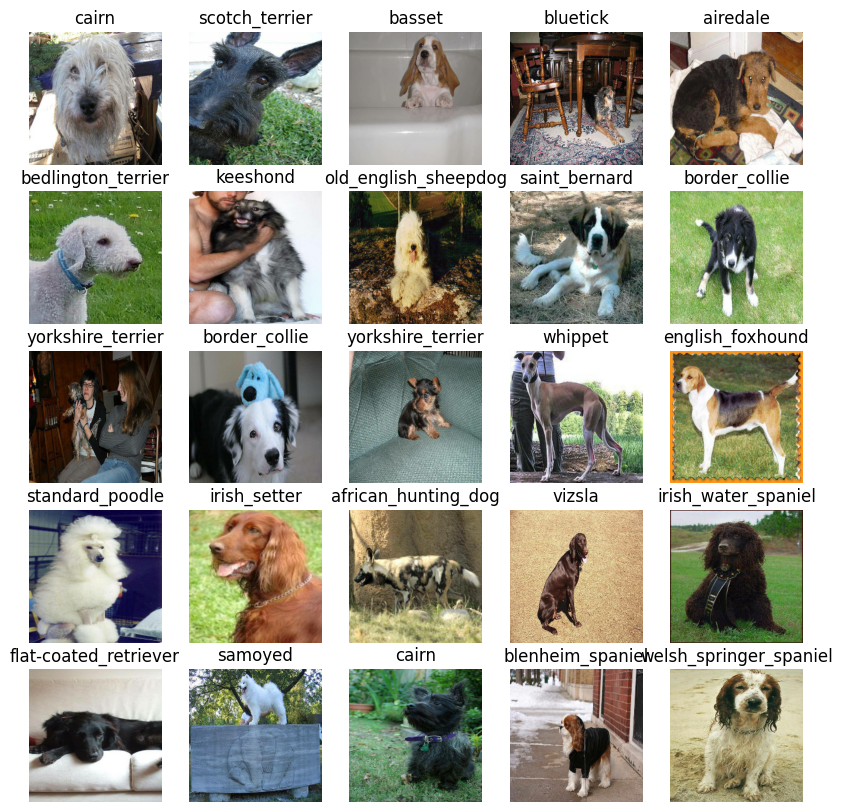

In [28]:
# Now lets visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model

Before we build a model, there are a few things we need to define:

* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use

In [29]:
# Setup input shape to the model
IMG_SIZE = 224
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [30]:
import tf_keras

Now we've got our inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion.
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model.


In [31]:
# Creates a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf_keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf_keras.layers.Dense(
        units=OUTPUT_SHAPE,
        activation="softmax" # Layer 2 (output layer)
    )
  ])

  # Compile the model
  model.compile(
      loss=tf_keras.losses.CategoricalCrossentropy(),
      optimizer=tf_keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [32]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


## Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if it's finding itself doing no good.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

### TensorBoard callback

To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our models `fit()` function.
3. Visualize our models training logs with the `%tensorboard` magic function (we'll do this after model training).

In [39]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [33]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/Dog Vision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf_keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

In [34]:
# Create early stopping callback
early_stopping = tf_keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                   patience=3)

## Training a model (on a subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working.

In [35]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [36]:
# Check to make sure we're still running on a GPU
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


Lets create a function to train a model.

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* Fit the model using `model.fit()`
* Return the model

In [37]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])

  return model

In [38]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 164s 6s/step - loss: 4.5793 - accuracy: 0.0862 - val_loss: 3.3769 - val_accuracy: 0.1900
Epoch 2/100
25/25 [==============================] - 5s 182ms/step - loss: 1.6152 - accuracy: 0.7063 - val_loss: 2.1548 - val_accuracy: 0.5050
Epoch 3/100
25/25 [==============================] - 4s 161ms/step - loss: 0.5508 - accuracy: 0.9413 - val_loss: 1.6939 - val_accuracy: 0.5750
Epoch 4/100
25/25 [==============================] - 4s 141ms/step - loss: 0.2486 - accuracy: 0.9912 - val_loss: 1.5018 - val_accuracy: 0.6250
Epoch 5/100
25/25 [==============================] - 5s 179ms/step - loss: 0.1441 - accuracy: 0.9962 - val_loss: 1.4234 - val_accuracy: 0.6250
Epoch 6/100
25/25 [==============================] - 3s 139ms/step - loss: 0.0994 - accuracy: 1.0000 - val_loss: 1.3787 - val_accuracy: 0.6400
Epoch 7/100
25/25 [==============================]

**Question:** It looks like our model is overfitting because its performing far better on the training dataset than the validation set, what are some ways to prevent model overfitting in deep learning neural networks?

Note: Overfitting to begin with is good! It means our model is learning!

### Checking the TensorBoard logs

The TensorBoard magic function `(%tensorboard)` will access the logs directory we created earlier and visualize its contents.

In [ ]:
#%tensorboard --logdir drive/MyDrive/Dog\ Vision/logs

## Making and evaluating predictions using a trained model

In [40]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 11s 142ms/step


array([[1.28782436e-03, 5.83054134e-05, 1.75925530e-03, ...,
        5.32144040e-05, 1.22144293e-05, 5.89706795e-03],
       [5.36892982e-03, 1.39975862e-03, 6.67040572e-02, ...,
        5.12738014e-04, 2.35871924e-03, 4.22044759e-05],
       [3.88130102e-05, 2.21431488e-04, 1.57822906e-05, ...,
        1.06815365e-04, 3.50739247e-05, 1.21363264e-04],
       ...,
       [3.05633657e-05, 7.79620823e-05, 4.99806920e-05, ...,
        7.02488933e-06, 8.15340318e-05, 2.66433290e-05],
       [2.84070126e-03, 1.22904676e-04, 1.31886787e-04, ...,
        9.06557761e-05, 3.13740493e-05, 1.49183220e-03],
       [7.36963702e-04, 2.43306480e-04, 6.62950843e-05, ...,
        2.23077927e-02, 4.44867968e-04, 1.62171520e-04]], dtype=float32)

In [41]:
predictions.shape, len(val_data)

((200, 120), 7)

In [42]:
# First prediction
index = 42
#print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

Max value (probability of prediction): 0.6710782647132874
Sum: 1.0
Max index: 113
Predicted label: walker_hound


Having the above functionality is great but we want to be able to do it at scale.
And it would be even better if we could see the image the prediction is being made on!

**Note:** Prediction probabilities are also known as confidence levels.

In [43]:
## Turn prediction probabilities into their respective label (easier to understand)
def get_pred_labels(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_labels(predictions[81])
pred_label

'dingo'

Now since our validation data is still in a batch dataset, we'll have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels).

In [44]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in val_data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(unique_breeds[np.argmax(label)])
  return images, labels

  # Unbatchify the validation data
  val_images, val_labels = unbatchify(val_data)
  len(val_images), len(val_labels)


Now we've got ways to get:
* Prediction labels
* Validation labels (truth labels)
* Validation images

Lets make some function to make all these a bit more visual.

We'll create a funciton which:
* Takes an array of prediction probabilities, an array of truth labels and an array of images.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot.


In [45]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], unique_breeds[labels[n].argmax()], images[n]

  # Get the prediction label
  pred_label = get_pred_labels(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change the plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label,
                                    color = color))

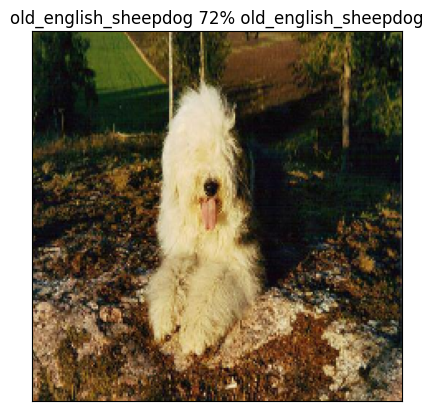

In [46]:
plot_pred(prediction_probabilities=predictions,
        labels=val_labels,
        images=val_images,
        n = 7)

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.

This function will:
* Take an input of prediction probabilities array and a ground truth array and an integer
* Find the prediction using `get_pred_label()`
* Find the top 10:
 * Prediction probabilities indexes
 * Prediction probabilities values
 * Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green

In [47]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], unique_breeds[labels[n].argmax()]

  # Get the predicted label
  pred_label = get_pred_labels(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass
  plt.tight_layout()


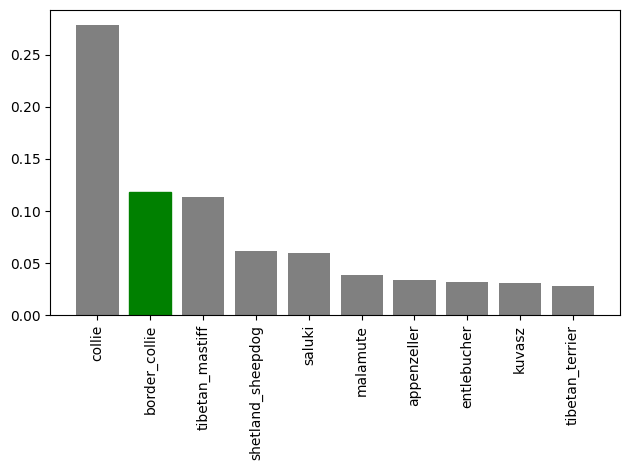

In [48]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

Now we've got some functions to visualize our models predictions, let's check out a few

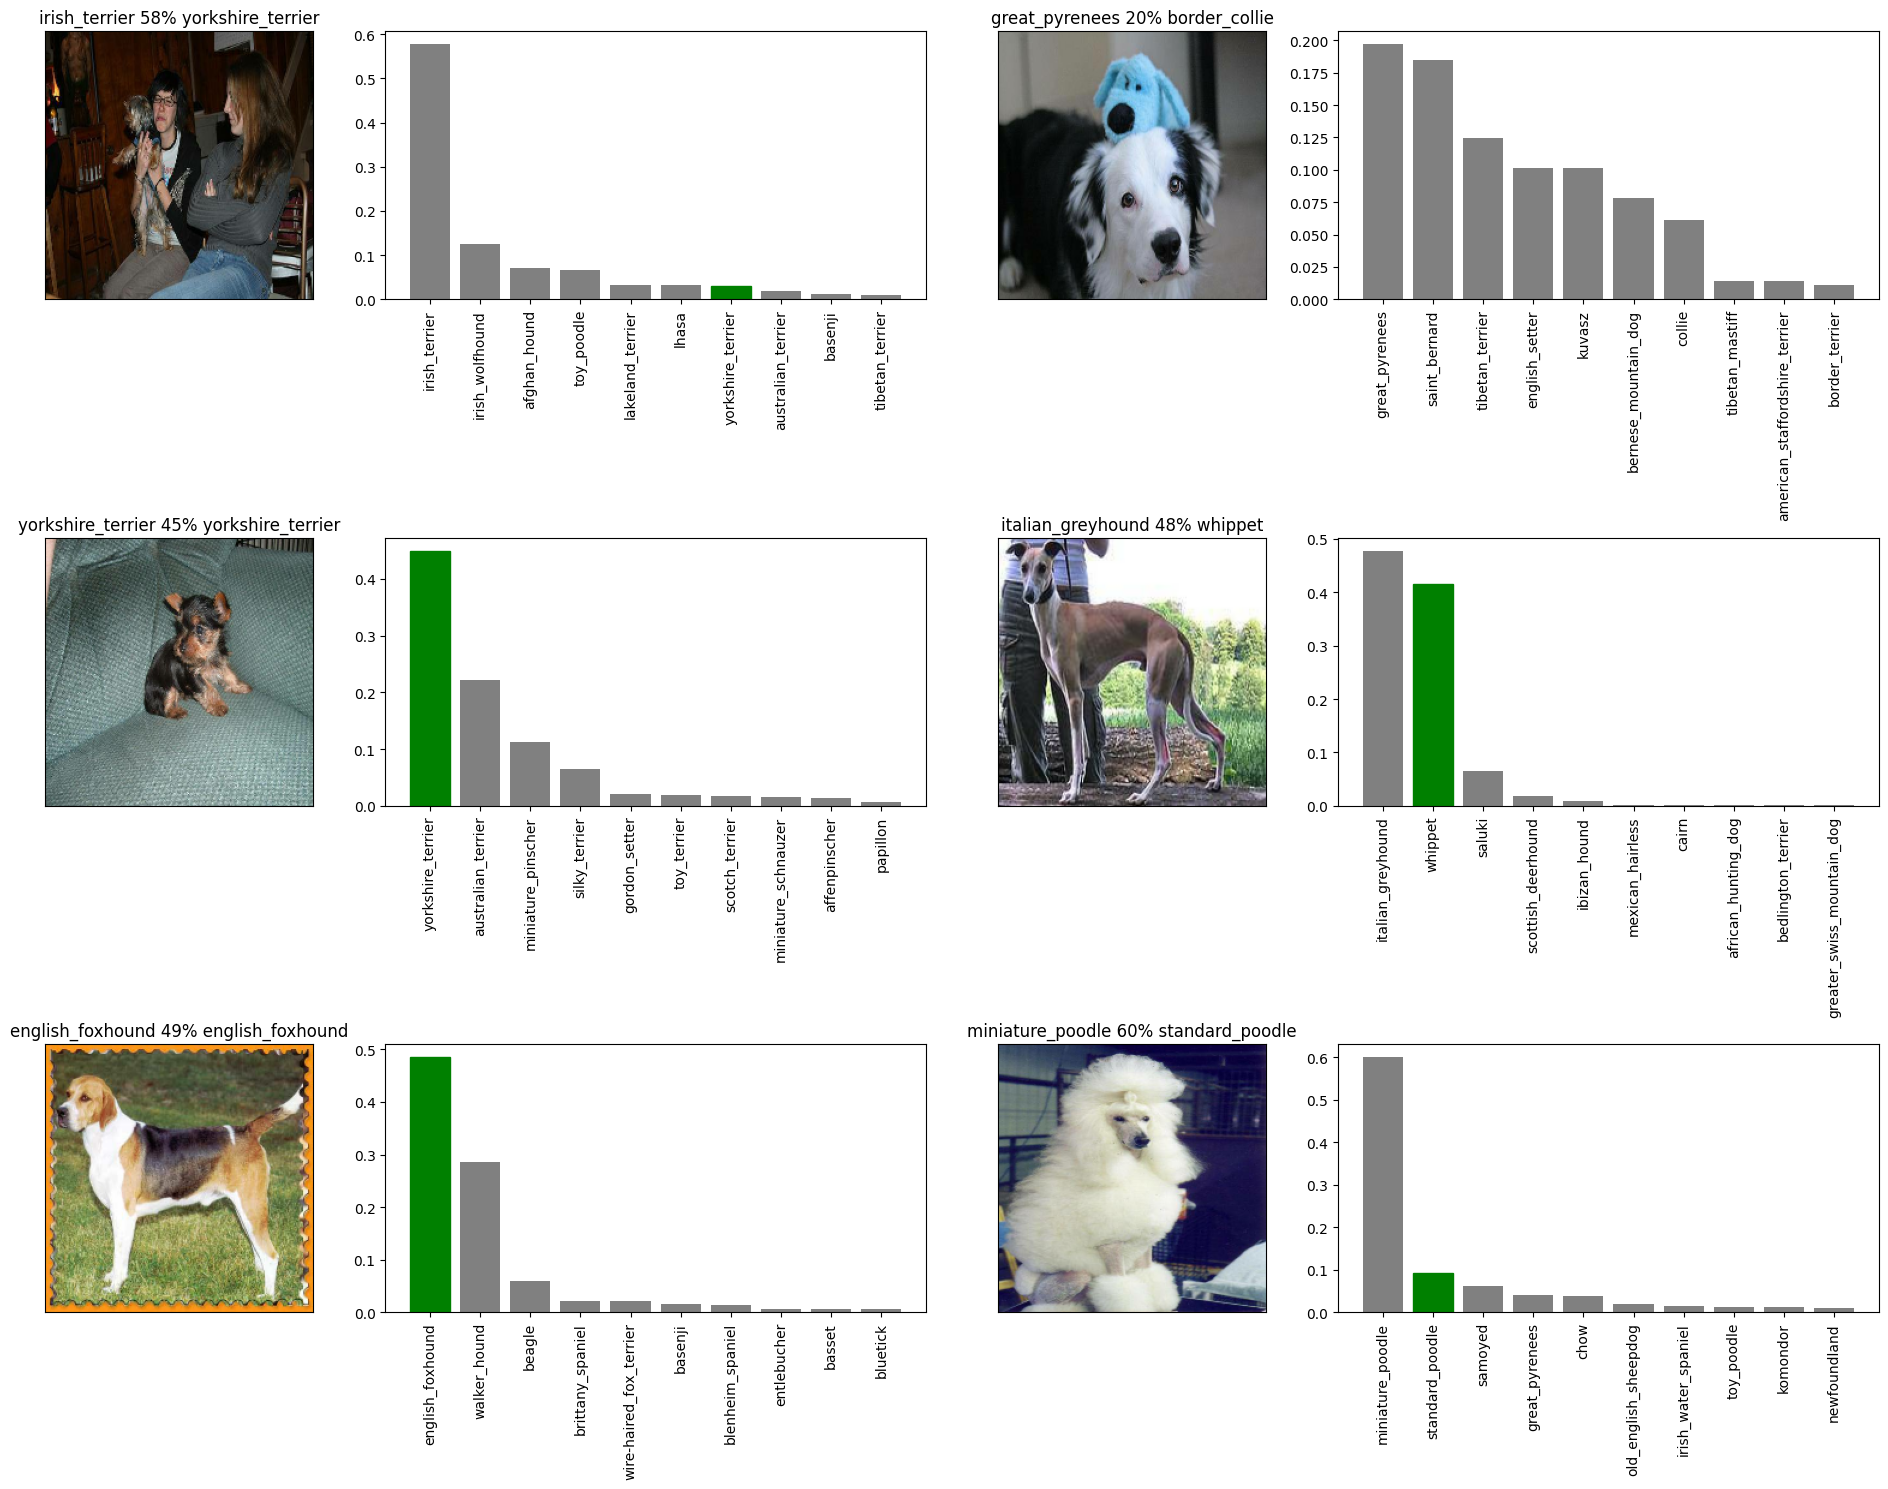

In [49]:
# Lets check out a few predictions and their different values
i_multiplier = 10
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
  plt.tight_layout(h_pad = 1.0)
plt.show()

## Saving and reloading a trained model

In [50]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/MyDrive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [51]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf_keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

Now we've got functions to save and load a trained model, let's make sure they work!

In [52]:
# Save our model trained on 1000 images
save_model(model, suffix = "1000-images-mobilenetv2-Adam")

Saving model to: drive/MyDrive/Dog Vision/models/20241005-21201728163220-1000-images-mobilenetv2-Adam.h5...


/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/MyDrive/Dog Vision/models/20241005-21201728163220-1000-images-mobilenetv2-Adam.h5'

In [53]:
# Load a trained model
loaded_image_model = load_model('drive/MyDrive/Dog Vision/models/20241004-20301728073837-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: drive/MyDrive/Dog Vision/models/20241004-20301728073837-1000-images-mobilenetv2-Adam.h5


In [54]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 156ms/step - loss: 1.2248 - accuracy: 0.6800


[1.2248378992080688, 0.6800000071525574]

In [55]:
# Evaluate the loaded model
loaded_image_model.evaluate(val_data)

7/7 [==============================] - 1s 105ms/step - loss: 1.3106 - accuracy: 0.6700


[1.3105806112289429, 0.6700000166893005]

## Training a big dog model on the full data

In [56]:
len(X), len(y)

(10222, 10222)

In [57]:
# Create a data batch with the full data set
full_data = create_data_batches(X, y)

Creating training data batches...


In [58]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [59]:
# Create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [60]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf_keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)


In [ ]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs = NUM_EPOCHS,
               callbacks = [full_model_tensorboard, full_model_early_stopping]) # this will take a while

Epoch 1/100
320/320 [==============================] - 1437s 4s/step - loss: 1.3458 - accuracy: 0.6728
Epoch 2/100
320/320 [==============================] - 39s 122ms/step - loss: 0.3992 - accuracy: 0.8797
Epoch 3/100
320/320 [==============================] - 39s 121ms/step - loss: 0.2398 - accuracy: 0.9338
Epoch 4/100
320/320 [==============================] - 41s 129ms/step - loss: 0.1544 - accuracy: 0.9649
Epoch 5/100
320/320 [==============================] - 41s 129ms/step - loss: 0.1042 - accuracy: 0.9797
Epoch 6/100
320/320 [==============================] - 41s 129ms/step - loss: 0.0778 - accuracy: 0.9860
Epoch 7/100
320/320 [==============================] - 43s 135ms/step - loss: 0.0589 - accuracy: 0.9909
Epoch 8/100
320/320 [==============================] - 43s 134ms/step - loss: 0.0466 - accuracy: 0.9944
Epoch 9/100
320/320 [==============================] - 41s 129ms/step - loss: 0.0365 - accuracy: 0.9962
Epoch 10/100
320/320 [==============================] - 41s 129ms

In [ ]:
save_model(full_model, suffix= "full-image-set-mobilenetv2-Adam")

In [ ]:
# Load in the full model
loaded_full_model = load_model("drive/MyDrive/Dog Vision/models/full-images-set-mobilenet-v2-Adam")

## Making predictions on the test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

We created `create_data_batches()` earlier which can take a list of filenames as input and convert them into Tensor batches.

To make predictions on the test data, we'll:
* Get the test image filenames
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` since the test data doesn't have labels.
* Make a predictions array by passing the test batches to the `predict()` method called on our model

In [ ]:
# Load test image filenames
test_path = "drive/MyDrive/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

In [ ]:
len(test_filenames)

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data = True)

In [ ]:
test_data

**Note:** Calling `predict()` on our full model and passing it the test data batch will take a while.

In [ ]:
# Make predictions on the test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose = 1)

In [ ]:
# Save predictions (np array) to csv file
np.savetxt("drive/MyDrive/Dog Vision/preds_array.csv",
           test_predictions, delimiter = ",")

In [ ]:
# Load predictions (np array) from csv file
test_predictions = np.loadtxt("drive/MyDrive/Dog Vision/preds_array.csv", delimiter = ",")

In [ ]:
test_predictions.shape

## Preparing test dataset predictions for Kaggle

Looking at the kaggle sample submission, we find it wants our models prediction probability outputs in a DataFrame with an ID and a column for each different dog breed.

To get the data in this format, we'll:
* Create a pandas dataframe with an ID column as well as a column for each dog breed.
* Add data to the ID column by extracting the test image ID's from their filepath.
* Add data (the prediction probabilities) to each of the dog breed columns.
* Export the dataframe as a csv to submit it to kaggle.

In [ ]:
# Create a pandas dataframe with empty columns
preds_df = pd.DataFrame(columns=["id"] + unique_breeds)
preds_df.head()

In [ ]:
# Append test image ID's to predictions dataframe
test_ids = [os.path.splitext(os.path.basename(path))[0] for path in test_filenames]
preds_df["id"] = test_ids
preds_df.head()

In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

In [ ]:
# Save our predictions dataframe to csv for kaggle submission
preds_df.to_csv("drive/MyDrive/Dog Vision/full_model_predictions1.csv", index = False)

## Making predictions on custom images

To make predictions on custom images, we'll:
* Get the filepaths of our own images.
* Turn the filepaths into data batches using `create_data_batches`. And since our custom images wont have labels, we set the `test_data` parameter to `True`.
* Pass the custom image data batch to our models `predict()` method.
* Convert the prediction output probabilities to prediction labels.
* Compare the predicted labels to the custom images


In [ ]:
# Get custome image filepaths
custom_path = "drive/MyDrive/Dog Vision/dogs/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_paths

In [ ]:
# Turn custom images into data batches
custom_data = create_data_batches(custom_image_paths, test_data = True)
custom_data

In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [ ]:
custom_preds.shape

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_labels(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_

In [ ]:
# Get custom images (our unbatchify() function wont work since there arent labels...)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)


In [ ]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)